In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
    # Reflect Database into ORM classes
        #Base = automap_base()
        #Base.prepare(engine, reflect=True)
        #Base.classes.keys()
        
base=automap_base()
# reflect the tables
base.prepare(engine, reflect=True)
# We can view all of the classes that automap found
#orm.keys()
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
st=base.classes.station

In [8]:
me=base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [36]:
# Design a query to retrieve the last 12 months of precipitation data 
#and plot the results.

#View Stations to see dates
#engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()
# Total dates
all_date=session.query(func.count(me.date)).all()
all_date

[(19550)]

In [94]:
#prec_data = session.query(me).filter(me.date =< 2019, 8, 20).all()
#for mammal in mammals:

#The Earliest Date
early_date=session.query(me.date).order_by(me.date.asc()).first()
early_date

('2010-01-01')

In [41]:
# Calculate the date 1 year ago from the last data point in the database

#this is close enough, right? pls
# Latest Date

late_date=session.query(me.date).order_by(me.date.desc()).first()
late_date

('2017-08-23')

In [42]:
#Find Column data to plot with
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [52]:
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date

#ALl dates greater than 2016-08-23
#add prcp data

data1=session.query(me.date, me.prcp).filter(me.date > '2016-08-22').\
    order_by(me.date.desc()).all()
data1

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [108]:
#Format raw data into dataframes and plot

#replot with variable of year ago data, because plot isnt working correctly
#create variable for year to date
#yeartodate= session.query(me.date).first()
#late_date must not be string
#late_date
yeartodate=dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
yeartodate

datetime.datetime(2016, 8, 23, 0, 0)

In [132]:
# Save the query results as a Pandas DataFrame and set the index to
#the date column

#new query to reflect no date
data2=session.query(me.date, me.prcp).filter(me.date > yeartodate).\
    order_by(me.date.desc()).all()

#Create a dataframe and plot it
df1=pd.DataFrame(data2)
                 #, columns=['date', 'percipitation'])
                 #, columns=['id', 'station', 'prcp','date'])
    
#df1['date']=pd.to_datetime(df1['date'], format='%Y-%m-%d')

#set index
df1=df1.set_index('date')

#sort again by date
df1=df1.sort_values(by='date')
df1.head()

,prcp
date,
2016-08-24,1.45
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.15
2016-08-24,NaN


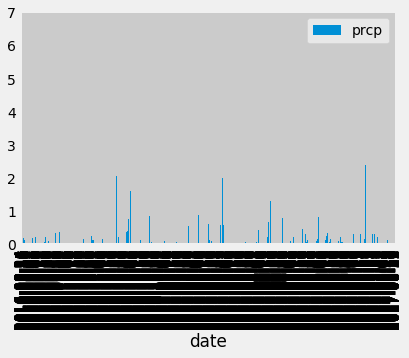

In [133]:
# Use Pandas Plotting with Matplotlib to plot the data

#Plot Data
plot1=df1.plot.bar()
plt.legend(loc='upper right')
#plt.tight_layout
plt.show()

In [134]:
#df1.count()

# Use Pandas to calcualte the summary statistics for the precipitation data
df1.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [135]:
#------------------------------------------------------------------------

In [136]:
# Design a query to show how many stations are available in this dataset

#stations1=session.query(me.st).sum()
stations1=session.query(me).group_by(me.station).count()
print(stations1)

9


In [137]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#data2=session.query(me.station, me.prcp).\
   # filter(me.date > '2016-08-22').\
    #order_by('me.date').all()
active1 = session.query(me.station, func.count(me.station)).\
        group_by(me.station).\
        order_by(func.count(me.station).desc()).all()
active1

active_df=pd.DataFrame(active1, columns=['station','count'])
active_df

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [138]:
# Using the station id from the previous query, calculate the lowest 
#temperature recorded, highest temperature recorded, and average 

#temperature of the most active station?
#return


temperature= session.query(func.min(me.tobs), func.max(me.tobs), 
                           func.avg(me.tobs)) #.filter(me.station == active1).all()
print(f"Lowest Temperature Recorded:{temperature[0][0]}", 
      f"Highest Temperature Recorded: {temperature[0][1]}", 
      f"Average Temperature Recorded: {temperature[0][2]}")


Lowest Temperature Recorded:53.0 Highest Temperature Recorded: 87.0 Average Temperature Recorded: 73.09795396419437


In [150]:
# Choose the station with the highest number of temperature observations.

#Create the dataframe
#temp1=session.query(me.station, func.count(me.station).\
                     #label('count').group_by(me.station).desc()).all()

most_active=session.query(me.station, func.count(me.tobs)).group_by(me.station).\
                        order_by(func.count(me.station).desc()).first()
most_active


('USC00519281', 2772)

In [151]:
#rework variable so its no longer a string
most_active=most_active[0]
most_active

'USC00519281'

In [154]:
# Query the last 12 months of temperature observation data for this station

most_activeyr = session.query(me.tobs).filter(me.station == most_active).\
                filter(me.date >= yeartodate).order_by(me.date.desc()).all()

most_activeyr_df = pd.DataFrame(most_activeyr)
most_activeyr_df.head()

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


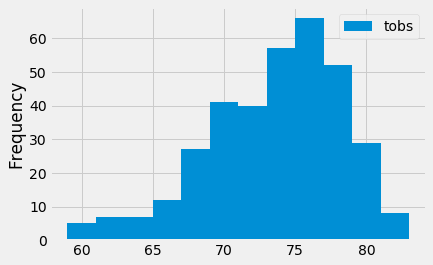

In [174]:
most_activeyr_df.plot.hist(bins=12)
#plt.legend(('Tobs'), loc='upper right')
#plt.ylabel=("frequency")
plt.xlabel=("Temperature")
plt.show()

#I guess fuck the xlabel? lolwut

## Bonus Challenge Assignment

In [177]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(me.tobs), func.avg(me.tobs), func.max(me.tobs)).\
        filter(me.date >= start_date).filter(me.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [179]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

temperature2= session.query(func.tmin(me.tobs), func.tmax(me.tobs), 
                           func.tavg(me.tobs))
print(f"Lowest Temperature Recorded:{temperature2[0][0]}", 
      f"Highest Temperature Recorded: {temperature2[0][1]}", 
      f"Average Temperature Recorded: {temperature2[0][2]}")


OperationalError: (sqlite3.OperationalError) no such function: tmin
[SQL: SELECT tmin(measurement.tobs) AS tmin_1, tmax(measurement.tobs) AS tmax_1, tavg(measurement.tobs) AS tavg_1 
FROM measurement
 LIMIT ? OFFSET ?]
[parameters: (1, 0)]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
